In [0]:
import gym 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import clear_output

In [144]:
env = gym.make('FrozenLake-v0',is_slippery = False)
print(env.observation_space,env.action_space)
obs_space = [16]
action_space = [4]
Q = np.zeros((obs_space+action_space))
N = np.zeros((obs_space+action_space))
alpha = 0.1
scores = []
avg_scores = []
gamma = 0.7
eps = 0.9

Discrete(16) Discrete(4)


In [0]:
def policy(obs,eps):
  if np.random.uniform(0,1,1) < eps:
    return np.random.randint(0,4,1)[0]
  else:
    return np.argmax(Q[obs])

In [145]:

# SARSA- On Policy TD(0)

for counter in range(20000):
  state = env.reset()
  done = False
  while not done:
    
    action = policy(state,eps)
    next_state,reward,done,_ = env.step(action)
    next_action = policy(next_state,eps)
    
    target = reward + gamma*Q[next_state][next_action]
    Q[state][action] += alpha*(target - Q[state][action])
    state = next_state
    
  if counter%100 ==0: eps -= eps*0.01
  if counter%2000==0:
    print("{:5d} {:7.5f} {:7.5f}".format(counter,eps,Q.mean()))

    0 0.89100 0.00000
 2000 0.72876 0.05719
 4000 0.59605 0.07317
 6000 0.48752 0.08494
 8000 0.39874 0.10340
10000 0.32613 0.11100
12000 0.26675 0.12202
14000 0.21817 0.13268
16000 0.17845 0.14262
18000 0.14595 0.14515


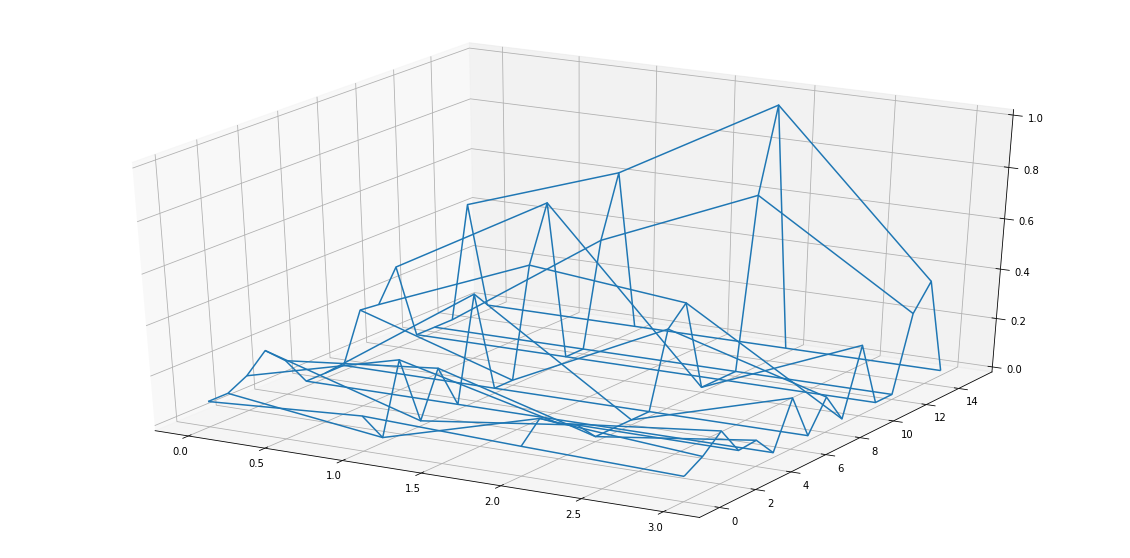

In [154]:
plot3d(Q)

In [147]:
for i,data in enumerate(Q):
  print(i,data)

0 [0.08248331 0.12118472 0.09881044 0.08040524]
1 [0.0823524  0.         0.17539557 0.12398076]
2 [0.12075822 0.27896202 0.12171987 0.19005708]
3 [0.19039853 0.         0.08107317 0.07831223]
4 [0.11700291 0.18017    0.         0.08446139]
5 [0. 0. 0. 0.]
6 [0.         0.41298418 0.         0.18559226]
7 [0. 0. 0. 0.]
8 [0.19699717 0.         0.30156309 0.12237323]
9 [0.18853722 0.43681192 0.37462609 0.        ]
10 [0.31186893 0.65348993 0.         0.26499524]
11 [0. 0. 0. 0.]
12 [0. 0. 0. 0.]
13 [0.         0.41701622 0.67986854 0.29736101]
14 [0.44890342 0.65862862 1.         0.39553853]
15 [0. 0. 0. 0.]


In [148]:
V = np.max(Q[:,:],axis = -1).reshape((4,4))
print(V)

[[0.12118472 0.17539557 0.27896202 0.19039853]
 [0.18017    0.         0.41298418 0.        ]
 [0.30156309 0.43681192 0.65348993 0.        ]
 [0.         0.67986854 1.         0.        ]]


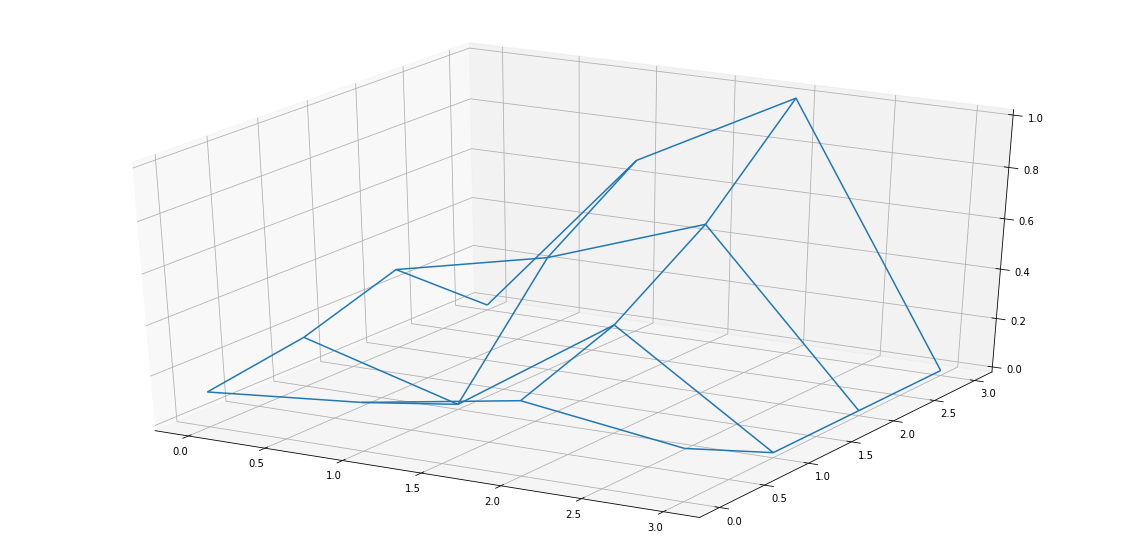

In [153]:
def plot3d(Z):
  X, Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
  fig = plt.figure(figsize = (20,10))
  ax = fig.add_subplot(111,projection='3d')
  ax.plot_wireframe(X,Y,Z,rstride=1,cstride=1) 
  
plot3d(V)